In [1]:
import io
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dropout, MaxPooling2D, Conv2D, Dense
from keras.datasets import cifar10
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from skimage.color import rgb2grey
%matplotlib inline

In [39]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [40]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [41]:
X = np.vstack((X_train,X_test))
y = np.vstack((y_train,y_test))

In [42]:
y = y.flatten()

In [43]:
X.shape, y.shape

((60000, 32, 32, 3), (60000,))

In [44]:
ind = [i for i,j in enumerate(y) if j == 4]

In [ ]:
len(ind)

In [45]:
X = X[ind]
y = y[ind]

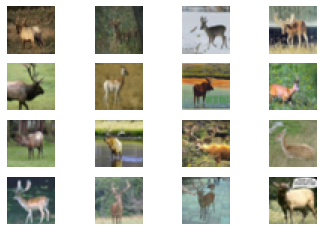

In [46]:
for i in range(0,16):
    axis = plt.subplot(4,4,i+1)
    arr = X[i]
    axis.imshow(arr)
    plt.axis('off')
plt.show()

In [47]:
X.shape, y.shape

((6000, 32, 32, 3), (6000,))

In [48]:
X = X.reshape((6144000,3))
X.shape

(6144000, 3)

In [49]:
kmeans = KMeans(n_clusters=24,random_state=0)
kmeans = kmeans.fit(X)

In [50]:
kmeans.cluster_centers_

array([[113.35527645, 137.37202938,  70.87722087],
       [181.69927821, 181.38424601, 173.70423132],
       [ 17.49244827,  17.9403675 ,  15.02452195],
       [ 85.64650584,  83.37365802,  73.22094125],
       [149.56324719, 154.2854663 , 150.93939161],
       [239.55859525, 241.76008201, 240.58035272],
       [141.54316884, 165.62401259,  95.17771684],
       [ 83.10706928,  66.65498007,  39.55488738],
       [199.91851379, 162.43740271,  95.40255121],
       [ 43.95332892,  44.18342793,  33.85038133],
       [134.58849938, 119.51516095,  93.19029632],
       [179.81960835, 171.09895638, 133.40858048],
       [122.51885054, 129.40504128, 122.88588112],
       [217.38149786, 197.56036338, 148.92604324],
       [121.7314569 ,  93.70946335,  57.83806662],
       [164.75057849, 123.74819877,  68.82931831],
       [161.4074724 , 187.51936772, 217.95875935],
       [104.76312002, 105.79392048,  92.02360899],
       [159.26892446, 141.36749524, 114.79130728],
       [213.88587854, 211.41347

In [51]:
X_new = X

In [52]:
X.shape

(6144000, 3)

In [53]:
for i in range(len(X)):
    X_new[i] = kmeans.cluster_centers_[kmeans.labels_[i]]

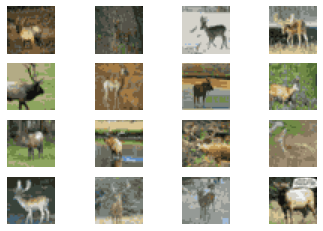

In [54]:
X_viz = X_new.reshape((6000,32,32,3))
for i in range(0,16):
    axis = plt.subplot(4,4,i+1)
    arr = X_viz[i]
    axis.imshow(arr)
    plt.axis('off')
plt.show()

In [55]:
from keras import utils as np_utils
y_N = keras.utils.np_utils.to_categorical(kmeans.labels_).reshape((6000,32,32,24))

In [56]:
X = X.reshape((6000,32,32,3))
X_N = []
for i in range(len(X)):
    X_N.append(rgb2grey(X[i]).tolist())
X_N = np.array(X_N)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.


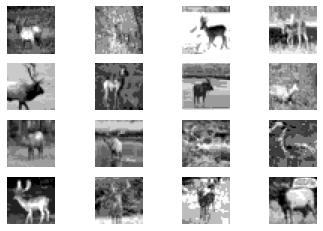

In [57]:
for i in range(0,16):
    axis = plt.subplot(4,4,i+1)
    arr = X_N[i]
    axis.imshow(arr,cmap='gray')
    plt.axis('off')
plt.show()

In [22]:
X_N.shape

(6000, 32, 32)

In [58]:
X_N = X_N.reshape((6000,32,32,1))
X_N.shape, y_N.shape

((6000, 32, 32, 1), (6000, 32, 32, 24))

In [59]:
X_train = X_N[0:5984]
y_train = y_N[0:5984]
X_test = X_N[-16:]
y_test = y_N[-16:]
X_train = np.vstack((X_train,X_test))
y_train = np.vstack((y_train,y_test))
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((6000, 32, 32, 1), (6000, 32, 32, 24), (16, 32, 32, 1), (16, 32, 32, 24))

In [60]:
cnn = Sequential()
cnn.add(Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(32,32,1)))
cnn.add(Conv2D(128, (3,3), activation='relu', padding='same'))
cnn.add(Conv2D(128, (3,3), activation='relu', padding='same'))
cnn.add(Conv2D(128, (3,3), activation='relu', padding='same'))
cnn.add(Conv2D(64, (3,3), activation='relu', padding='same'))
cnn.add(Dense(64, activation='relu'))
cnn.add(Dense(32, activation='relu'))
cnn.add(Dense(24, activation='softmax'))
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 32, 32, 64)        640       
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 128)       147584    
                                                                 
 conv2d_8 (Conv2D)           (None, 32, 32, 128)       147584    
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 64)        73792     
                                                                 
 dense_3 (Dense)             (None, 32, 32, 64)        4160      
                                                                 
 dense_4 (Dense)             (None, 32, 32, 32)       

Epoch 1/30
169/169 [==============================] - 10s 52ms/step - loss: 0.0357 - accuracy: 0.2218 - val_loss: 0.0317 - val_accuracy: 0.3371
Epoch 2/30
169/169 [==============================] - 8s 47ms/step - loss: 0.0269 - accuracy: 0.4690 - val_loss: 0.0306 - val_accuracy: 0.3445
Epoch 3/30
169/169 [==============================] - 8s 50ms/step - loss: 0.0222 - accuracy: 0.5905 - val_loss: 0.0218 - val_accuracy: 0.4966
Epoch 4/30
169/169 [==============================] - 8s 47ms/step - loss: 0.0207 - accuracy: 0.6424 - val_loss: 0.0183 - val_accuracy: 0.7032
Epoch 5/30
169/169 [==============================] - 8s 48ms/step - loss: 0.0191 - accuracy: 0.6851 - val_loss: 0.0226 - val_accuracy: 0.6595
Epoch 6/30
169/169 [==============================] - 8s 47ms/step - loss: 0.0200 - accuracy: 0.6878 - val_loss: 0.0117 - val_accuracy: 0.8006
Epoch 7/30
169/169 [==============================] - 8s 47ms/step - loss: 0.0163 - accuracy: 0.7301 - val_loss: 0.0137 - val_accuracy: 0.750

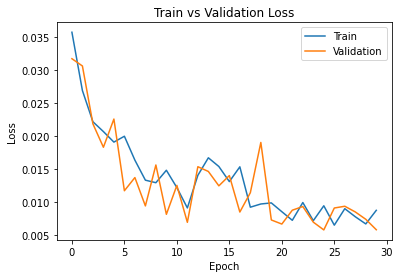

In [61]:
cnn.compile(loss='mean_squared_error', optimizer='adam', metrics = ['accuracy'])
history = cnn.fit(X_train, y_train, epochs=30, validation_split=0.1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Train vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [62]:
predictions = cnn.predict(X_test)
predictions.shape

(16, 32, 32, 24)

In [64]:
predictions = predictions.reshape((16384,24))
pred = predictions[:,0:3]
for i in range(len(predictions)):
    pred[i] = kmeans.cluster_centers_[np.argmax(predictions[i])].tolist()
pred = pred.reshape((16,32,32,3))

In [32]:
y_test.shape

(16, 32, 32, 12)

In [65]:
real = y_test.reshape((16384,24))
yy = real[:, 0:3]
for i in range(len(real)):
  yy[i] = kmeans.cluster_centers_[np.argmax(real[i])].tolist()
yy = yy.reshape((16,32,32,3))

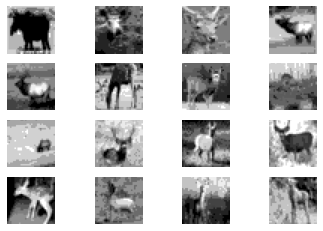

In [66]:
for i in range(0,16):
    axis = plt.subplot(4,4,i+1)
    arr = X_test.reshape(16,32,32)[i]
    axis.imshow(arr, cmap='gray')
    plt.axis('off')
plt.show()

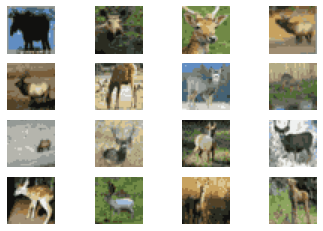

In [67]:
for i in range(0,16):
    axis = plt.subplot(4,4,i+1)
    arr = yy[i]
    axis.imshow(arr.astype(np.uint8))
    plt.axis('off')
plt.show()

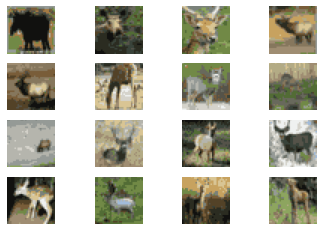

In [68]:
for i in range(0,16):
    axis = plt.subplot(4,4,i+1)
    arr = pred[i]
    axis.imshow(arr.astype(np.uint8))
    plt.axis('off')
plt.show()